In [2]:
#Importing the required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
#Reading the overall train dataset
data = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/Sameek/0. University of North Texas/UNT Masters Course/Semester 1 - Fall 2024/CSCE 5214 - Software Development for AI/Project 1/spaceship-titanic/train.csv')

#Displaying the first 5 rows of the overall train dataset
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
#Getting the datatypes of the dataset
data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
data_TotalExpenses = data[['RoomService', 'FoodCourt','ShoppingMall','Spa']]

# Calculate sum of each row and create 'sum' column
data_TotalExpenses['Total Expenses'] = data_TotalExpenses.sum(axis=1)

# Create 'Total Expenses' column in the original DataFrame
data['Total Expenses'] = data_TotalExpenses['Total Expenses']

data_updated = data[['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'Transported', 'Total Expenses']]

# Splitting the 'Cabin' column
data_updated[['Deck','Num', 'Side']] = data_updated['Cabin'].str.split('/', expand=True)

# Selecting the desired columns for the final data_updated DataFrame
data_updated = data_updated[['PassengerId', 'HomePlanet', 'CryoSleep', 'Deck', 'Num', 'Side', 'Destination', 'Age', 'VIP', 'Total Expenses','Transported']]
data_updated

C:\Users\bhatt\AppData\Local\Temp\ipykernel_10148\3979601967.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_TotalExpenses['Total Expenses'] = data_TotalExpenses.sum(axis=1)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_10148\3979601967.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_updated[['Deck','Num', 'Side']] = data_updated['Cabin'].str.split('/', expand=True)
C:\Users\bhatt\AppData\Local\Temp\ipykernel_10148\3979601967.py:12: SettingWithCopyWarning: 
A value is trying to be set on a 

,PassengerId,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,Total Expenses,Transported
0,0001_01,Europa,False,B,0,P,TRAPPIST-1e,39.0,False,0.0,False
1,0002_01,Earth,False,F,0,S,TRAPPIST-1e,24.0,False,692.0,True
2,0003_01,Europa,False,A,0,S,TRAPPIST-1e,58.0,True,10334.0,False
3,0003_02,Europa,False,A,0,S,TRAPPIST-1e,33.0,False,4983.0,False
4,0004_01,Earth,False,F,1,S,TRAPPIST-1e,16.0,False,1089.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,98,P,55 Cancri e,41.0,True,8462.0,False
8689,9278_01,Earth,True,G,1499,S,PSO J318.5-22,18.0,False,0.0,False
8690,9279_01,Earth,False,G,1500,S,TRAPPIST-1e,26.0,False,1873.0,True
8691,9280_01,Europa,False,E,608,S,55 Cancri e,32.0,False,1402.0,False


In [6]:
#print the number of missing values in each column
print(data_updated.isnull().sum())

PassengerId         0
HomePlanet        201
CryoSleep         217
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP               203
Total Expenses      0
Transported         0
dtype: int64


In [7]:
data_updated.loc[(data_updated['Total Expenses'] == 0) & (data_updated['CryoSleep'].isnull()), 'CryoSleep'] = True

In [8]:
data_updated.loc[(data_updated['Total Expenses'] != 0) & (data_updated['CryoSleep'].isnull()), 'CryoSleep'] = False

In [9]:
print(data_updated.isnull().sum())

PassengerId         0
HomePlanet        201
CryoSleep           0
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP               203
Total Expenses      0
Transported         0
dtype: int64


In [10]:
print(data_updated[(data_updated['Age'] < 18) & (data_updated['VIP'] == True)].shape[0])

0


In [11]:
data_updated.loc[(data_updated['Age'] < 18) & (data_updated['VIP'].isnull()), 'VIP'] = False

In [12]:
print(data_updated.isnull().sum())

PassengerId         0
HomePlanet        201
CryoSleep           0
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP               158
Total Expenses      0
Transported         0
dtype: int64


In [13]:
print(data_updated[(data_updated['HomePlanet'] == 'Earth') & (data_updated['VIP'] == True)].shape[0])

0


In [14]:
data_updated.loc[(data_updated['HomePlanet'] == 'Earth') & (data_updated['VIP'].isnull()), 'VIP'] = False

In [15]:
print(data_updated.isnull().sum())

PassengerId         0
HomePlanet        201
CryoSleep           0
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP                76
Total Expenses      0
Transported         0
dtype: int64


## Handling the missing values in 'HomePlanet'

In [16]:
data_updated[['Group','Person']] = data_updated['PassengerId'].str.split('_', expand=True)
data_updated['PassengerId'] = data['PassengerId']
data_updated = data_updated[['PassengerId', 'Group', 'HomePlanet', 'CryoSleep', 'Deck', 'Num', 'Side', 'Destination', 'Age', 'VIP', 'Total Expenses','Transported']]

In [17]:
data_updated.loc[:, 'HomePlanet'] = data_updated.groupby('Group')['HomePlanet'].ffill()
data_updated.loc[:, 'HomePlanet'] = data_updated.groupby('Group')['HomePlanet'].bfill()

C:\Users\bhatt\AppData\Local\Temp\ipykernel_10148\3583414770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_updated.loc[:, 'HomePlanet'] = data_updated.groupby('Group')['HomePlanet'].ffill()
C:\Users\bhatt\AppData\Local\Temp\ipykernel_10148\3583414770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_updated.loc[:, 'HomePlanet'] = data_updated.groupby('Group')['HomePlanet'].bfill()


In [18]:
print(data_updated.isnull().sum())
#there are still a few missing values in HomePlanet because some groups have only one person each

PassengerId         0
Group               0
HomePlanet        111
CryoSleep           0
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP                76
Total Expenses      0
Transported         0
dtype: int64


In [19]:
data_updated.loc[data_updated['Deck'].isin(['A', 'B', 'C', 'T']) & data_updated['HomePlanet'].isnull(), 'HomePlanet'] = 'Europa'

In [20]:
print(data_updated.isnull().sum())

PassengerId         0
Group               0
HomePlanet        104
CryoSleep           0
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP                76
Total Expenses      0
Transported         0
dtype: int64


In [21]:
data_updated.loc[(data_updated['Deck'] == 'D') & data_updated['HomePlanet'].isnull(), 'HomePlanet'] = 'Mars'

In [22]:
print(data_updated.isnull().sum())

PassengerId         0
Group               0
HomePlanet        100
CryoSleep           0
Deck              199
Num               199
Side              199
Destination       182
Age               179
VIP                76
Total Expenses      0
Transported         0
dtype: int64


In [24]:
from sklearn.impute import KNNImputer


# Create a copy of the DataFrame to avoid modifying the original
data_imputed = data_updated.copy()

# Select relevant columns for KNN imputation (numerical and categorical)
features = ['HomePlanet','Age', 'Deck', 'Num', 'Side', 'Destination', 'VIP']
data_subset = data_imputed[features]

# Convert categorical features to numerical using one-hot encoding
data_encoded = pd.get_dummies(data_subset, columns=['HomePlanet', 'Deck', 'Side', 'Destination', 'VIP'], dummy_na=False) #dummy_na=False will ignore nan values during one-hot encoding

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Fit and transform the data
data_imputed_array = imputer.fit_transform(data_encoded)

# Convert the imputed array back to a DataFrame
data_imputed = pd.DataFrame(data_imputed_array, columns=data_encoded.columns)

# Reverse one-hot encoding to get categorical features back
categorical_features = ['HomePlanet', 'Deck', 'Side', 'Destination', 'VIP']
for feature in categorical_features:
    #Get a list of columns related to the feature
    feature_cols = [col for col in data_imputed.columns if feature in col]

    #Find the column with the maximum value for each row and extract the category name
    data_imputed[feature] = data_imputed[feature_cols].idxmax(axis=1).str.replace(f'{feature}_', '')

    #Remove the one-hot encoded columns for the current feature
    data_imputed = data_imputed.drop(feature_cols, axis=1)

# Update the original DataFrame with imputed values
for feature in features:
    data_updated[feature] = data_imputed[feature]

print(data_updated.isnull().sum())

PassengerId       0
Group             0
HomePlanet        0
CryoSleep         0
Deck              0
Num               0
Side              0
Destination       0
Age               0
VIP               0
Total Expenses    0
Transported       0
dtype: int64


C:\Users\bhatt\AppData\Local\Temp\ipykernel_10148\1744089664.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_updated[feature] = data_imputed[feature]


In [25]:
data_updated = data_updated[['PassengerId', 'HomePlanet', 'CryoSleep', 'Deck', 'Num', 'Side', 'Destination', 'Age', 'VIP', 'Total Expenses','Transported']]

In [26]:
data_updated.head()

,PassengerId,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,Total Expenses,Transported
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,False
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,692.0,True
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,10334.0,False
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,4983.0,False
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,1089.0,True


In [28]:
data_updated

,PassengerId,HomePlanet,CryoSleep,Deck,Num,Side,Destination,Age,VIP,Total Expenses,Transported
0,0001_01,Europa,False,B,0.0,P,TRAPPIST-1e,39.0,False,0.0,False
1,0002_01,Earth,False,F,0.0,S,TRAPPIST-1e,24.0,False,692.0,True
2,0003_01,Europa,False,A,0.0,S,TRAPPIST-1e,58.0,True,10334.0,False
3,0003_02,Europa,False,A,0.0,S,TRAPPIST-1e,33.0,False,4983.0,False
4,0004_01,Earth,False,F,1.0,S,TRAPPIST-1e,16.0,False,1089.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A,98.0,P,55 Cancri e,41.0,True,8462.0,False
8689,9278_01,Earth,True,G,1499.0,S,PSO J318.5-22,18.0,False,0.0,False
8690,9279_01,Earth,False,G,1500.0,S,TRAPPIST-1e,26.0,False,1873.0,True
8691,9280_01,Europa,False,E,608.0,S,55 Cancri e,32.0,False,1402.0,False


In [29]:
# Target Encoding: This enconding is used when the relationship between 
#categories and the target variable is considerable and cannot be ignored.
import category_encoders as ce

# Used target encoding on the columns HomePlanet, Destination, Deck, CryoSleep, Side
target_encoder = ce.TargetEncoder(cols=['HomePlanet', 'Destination', 'Deck', 'CryoSleep', 'Side'])

In [30]:
# Transforming the encoded columns as per the target column
data_encoded = target_encoder.fit_transform(data_updated[['HomePlanet', 'Destination', 'Deck', 'CryoSleep', 'Side']], data_updated['Transported'])

In [31]:
print(data_encoded)

      HomePlanet  Destination      Deck  CryoSleep      Side
0       0.660055     0.471175  0.734275   0.328176  0.453575
1       0.424588     0.471175  0.439871   0.328176  0.555037
2       0.660055     0.471175  0.498901   0.328176  0.555037
3       0.660055     0.471175  0.498901   0.328176  0.555037
4       0.424588     0.471175  0.439871   0.328176  0.555037
...          ...          ...       ...        ...       ...
8688    0.660055     0.600404  0.498901   0.328176  0.453575
8689    0.424588     0.503769  0.516217   0.814673  0.555037
8690    0.424588     0.471175  0.516217   0.328176  0.555037
8691    0.660055     0.600404  0.357306   0.328176  0.555037
8692    0.660055     0.471175  0.357306   0.328176  0.555037

[8693 rows x 5 columns]


In [32]:
# Replacing the encoded values of the respective columns in the original dataset
data_updated['HomePlanet'] = data_encoded['HomePlanet']
data_updated['Destination'] = data_encoded['Destination']
data_updated['Deck'] = data_encoded['Deck']
data_updated['CryoSleep'] = data_encoded['CryoSleep']
data_updated['Side'] = data_encoded['Side']

In [33]:
print(data_updated)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
0        0001_01    0.660055   0.328176  0.734275     0.0  0.453575   
1        0002_01    0.424588   0.328176  0.439871     0.0  0.555037   
2        0003_01    0.660055   0.328176  0.498901     0.0  0.555037   
3        0003_02    0.660055   0.328176  0.498901     0.0  0.555037   
4        0004_01    0.424588   0.328176  0.439871     1.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
8688     9276_01    0.660055   0.328176  0.498901    98.0  0.453575   
8689     9278_01    0.424588   0.814673  0.516217  1499.0  0.555037   
8690     9279_01    0.424588   0.328176  0.516217  1500.0  0.555037   
8691     9280_01    0.660055   0.328176  0.357306   608.0  0.555037   
8692     9280_02    0.660055   0.328176  0.357306   608.0  0.555037   

      Destination   Age    VIP  Total Expenses  Transported  
0        0.471175  39.0  False             0.0        False  
1        0.471175  24.0

In [34]:
print(data_updated['VIP'].dtype)

object


In [35]:
# For the column VIP, replaced the False value with 0 and True value with 1
data_updated['VIP'] = data_updated['VIP'].replace({'True': 1, 'False': 0})
print(data_updated)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
0        0001_01    0.660055   0.328176  0.734275     0.0  0.453575   
1        0002_01    0.424588   0.328176  0.439871     0.0  0.555037   
2        0003_01    0.660055   0.328176  0.498901     0.0  0.555037   
3        0003_02    0.660055   0.328176  0.498901     0.0  0.555037   
4        0004_01    0.424588   0.328176  0.439871     1.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
8688     9276_01    0.660055   0.328176  0.498901    98.0  0.453575   
8689     9278_01    0.424588   0.814673  0.516217  1499.0  0.555037   
8690     9279_01    0.424588   0.328176  0.516217  1500.0  0.555037   
8691     9280_01    0.660055   0.328176  0.357306   608.0  0.555037   
8692     9280_02    0.660055   0.328176  0.357306   608.0  0.555037   

      Destination   Age  VIP  Total Expenses  Transported  
0        0.471175  39.0    0             0.0        False  
1        0.471175  24.0    

In [36]:
# Splitting and storing the taget column and the sample columns
X = data_updated[['PassengerId','HomePlanet','CryoSleep','Deck','Num','Side','Destination','Age','VIP','Total Expenses']]
y = data_updated[['Transported']]

In [37]:
print(X)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
0        0001_01    0.660055   0.328176  0.734275     0.0  0.453575   
1        0002_01    0.424588   0.328176  0.439871     0.0  0.555037   
2        0003_01    0.660055   0.328176  0.498901     0.0  0.555037   
3        0003_02    0.660055   0.328176  0.498901     0.0  0.555037   
4        0004_01    0.424588   0.328176  0.439871     1.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
8688     9276_01    0.660055   0.328176  0.498901    98.0  0.453575   
8689     9278_01    0.424588   0.814673  0.516217  1499.0  0.555037   
8690     9279_01    0.424588   0.328176  0.516217  1500.0  0.555037   
8691     9280_01    0.660055   0.328176  0.357306   608.0  0.555037   
8692     9280_02    0.660055   0.328176  0.357306   608.0  0.555037   

      Destination   Age  VIP  Total Expenses  
0        0.471175  39.0    0             0.0  
1        0.471175  24.0    0           692.0  
2     

In [38]:
print(y)

      Transported
0           False
1            True
2           False
3           False
4            True
...           ...
8688        False
8689        False
8690         True
8691        False
8692         True

[8693 rows x 1 columns]


In [39]:
# Splitting the training and validation set in 80:20 ratio
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [40]:
print(X_train)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
8563     9144_01    0.424588   0.328176  0.439871  1768.0  0.555037   
5649     6006_02    0.660055   0.814673  0.433054   190.0  0.453575   
7782     8307_02    0.660055   0.814673  0.498901   100.0  0.555037   
2767     2982_01    0.660055   0.814673  0.734275   111.0  0.555037   
7278     7783_01    0.523171   0.814673  0.439871  1487.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
2105     2257_01    0.660055   0.328176  0.680054    76.0  0.453575   
4091     4367_01    0.424588   0.814673  0.516217   710.0  0.555037   
3231     3475_03    0.660055   0.328176  0.680054   126.0  0.555037   
1330     1407_02    0.424588   0.328176  0.439871   278.0  0.453575   
4086     4361_01    0.424588   0.328176  0.439871   819.0  0.555037   

      Destination   Age  VIP  Total Expenses  
8563     0.471175  22.0    0           703.0  
5649     0.600404  26.0    0             0.0  
7782  

In [41]:
print(y_train)

      Transported
8563        False
5649         True
7782         True
2767         True
7278         True
...           ...
2105         True
4091         True
3231         True
1330         True
4086         True

[6954 rows x 1 columns]


In [42]:
print(X_test)

     PassengerId  HomePlanet  CryoSleep      Deck     Num      Side  \
1923     2056_03    0.424588   0.328176  0.439871   407.0  0.453575   
1388     1455_03    0.660055   0.814673  0.734275    62.0  0.555037   
4774     5091_01    0.424588   0.328176  0.439871   973.0  0.555037   
2005     2140_01    0.424588   0.328176  0.439871   424.0  0.453575   
4364     4645_02    0.660055   0.814673  0.734275   184.0  0.555037   
...          ...         ...        ...       ...     ...       ...   
8671     9253_01    0.424588   0.814673  0.516217  1493.0  0.555037   
6179     6525_02    0.424588   0.814673  0.516217  1061.0  0.555037   
163      0188_01    0.424588   0.814673  0.516217    31.0  0.555037   
7485     8007_02    0.424588   0.328176  0.357306   517.0  0.453575   
5262     5614_01    0.424588   0.814673  0.516217   906.0  0.555037   

      Destination   Age  VIP  Total Expenses  
1923     0.471175  68.0    0          2025.0  
1388     0.600404  22.0    0             0.0  
4774  

In [43]:
print(y_test)

      Transported
1923        False
1388         True
4774        False
2005         True
4364         True
...           ...
8671         True
6179         True
163          True
7485         True
5262         True

[1739 rows x 1 columns]


In [44]:
# Initializing the Logisitc Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\bhatt\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [45]:
y_pred = model.predict(X_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [47]:
print(f'Accuracy : {accuracy:.4f}')
print('Confusion Matrix :')
print(conf_matrix)
print('Classification Report :')
print(class_report)

Accuracy : 0.5923
Confusion Matrix :
[[579 289]
 [420 451]]
Classification Report :
              precision    recall  f1-score   support

       False       0.58      0.67      0.62       868
        True       0.61      0.52      0.56       871

    accuracy                           0.59      1739
   macro avg       0.59      0.59      0.59      1739
weighted avg       0.59      0.59      0.59      1739



#### Using F1 score and AUC-ROC for model performance measure

In [48]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [49]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred)
print(f'F1 Score: {f1:.4f}')

F1 Score: 0.5599


In [50]:
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC
roc_auc = roc_auc_score(y_test, y_prob)
print(f'AUC-ROC: {roc_auc:.4f}')

AUC-ROC: 0.6478


In [51]:
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

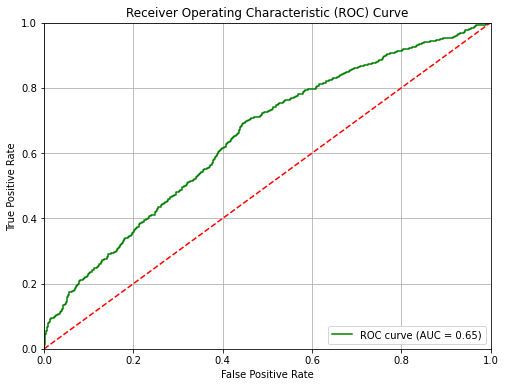

In [52]:
# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()